<a href="https://colab.research.google.com/github/aaruma/Intelligent-Systems/blob/main/Arjen_Arumalingam_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 2: Gradient Descent For Logistic Regression**

In [104]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression

# Dataset provided from D2L Lab 1
data = pd.read_csv("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv")
print(data)

     row.names  sbp  tobacco    ldl  adiposity  famhist  typea  obesity  \
0            1  160    12.00   5.73      23.11  Present     49    25.30   
1            2  144     0.01   4.41      28.61   Absent     55    28.87   
2            3  118     0.08   3.48      32.28  Present     52    29.14   
3            4  170     7.50   6.41      38.03  Present     51    31.99   
4            5  134    13.60   3.50      27.78  Present     60    25.99   
..         ...  ...      ...    ...        ...      ...    ...      ...   
457        459  214     0.40   5.98      31.72   Absent     64    28.45   
458        460  182     4.20   4.41      32.10   Absent     52    28.61   
459        461  108     3.00   1.59      15.23   Absent     40    20.09   
460        462  118     5.40  11.61      30.79   Absent     64    27.35   
461        463  132     0.00   4.82      33.41  Present     62    14.70   

     alcohol  age  chd  
0      97.20   52    1  
1       2.06   63    1  
2       3.81   46    0  

In [105]:
count_class = data['chd'].value_counts()
percentage_class = count_class / data.shape[0] * 100
print("Percentage of class 0:", percentage_class[0])
print("Percentage of class 1:", percentage_class[1])

Percentage of class 0: 65.36796536796537
Percentage of class 1: 34.63203463203463


In [106]:
missing_val = data.isnull().sum().sum()
print("Number of missing values: ", missing_val)

Number of missing values:  0


In [107]:
category_columns = data.select_dtypes(include='object').columns
print(category_columns)
category_num = len(category_columns)
print("Number of categorical variables: ", category_num)

Index(['famhist'], dtype='object')
Number of categorical variables:  1


In [108]:
correlation_matrix = data.corr()
correlation_max = correlation_matrix.abs().max().max()
print("Maximum Correlation: ", correlation_max)

Maximum Correlation:  1.0


<ipython-input-108-44d4f0677480>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [109]:
# One-Hot Encoding
encode_data = pd.get_dummies(data, columns = category_columns)

# Standardization
non_normalized_columns = data.columns.difference(category_columns)
normalized_data = encode_data.copy()

standardized_non_normalized = encode_data[non_normalized_columns].std()
mean_non_normalized = encode_data[non_normalized_columns].mean()

normalized_data[non_normalized_columns] = (encode_data[non_normalized_columns] - mean_non_normalized) / standardized_non_normalized

print(normalized_data)

     row.names       sbp   tobacco       ldl  adiposity     typea   obesity  \
0    -1.724186  1.057417  1.821099  0.477894  -0.295183 -0.418017 -0.176594   
1    -1.716720  0.276789 -0.789382 -0.159507   0.411694  0.193134  0.670646   
2    -1.709254 -0.991731 -0.774141 -0.608585   0.883374 -0.112441  0.734723   
3    -1.701788  1.545310  0.841352  0.806252   1.622382 -0.214300  1.411091   
4    -1.694322 -0.211103  2.169453 -0.598928   0.305020  0.702427 -0.012842   
..         ...       ...       ...       ...        ...       ...       ...   
457   1.695291  3.692037 -0.704470  0.598614   0.811401  1.109862  0.570971   
458   1.702758  2.130781  0.122871 -0.159507   0.860240 -0.112441  0.608942   
459   1.710224 -1.479624 -0.138395 -1.521228  -1.307946 -1.334744 -1.413043   
460   1.717690 -0.991731  0.384137  3.317227   0.691875  1.109862  0.309916   
461   1.725156 -0.308682 -0.791559  0.038474   1.028605  0.906144 -2.692210   

      alcohol       age       chd  famhist_Absent  

In [110]:
# Hypothesis (Model)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Cost Function
def entropy_loss(y, y_hat):
    loss = -y * np.log(y_hat) - (1-y) * np.log(1-y_hat)
    return loss.mean()

# Batch Gradient Descent Iteration
def updating_thetas(x, y, theta, alpha):
    m = x.shape[0]
    b = np.column_stack((np.ones((m, 1)), x))
    y_hat = sigmoid(np.dot(b, theta))
    gradient = np.dot(b.T, y_hat - y)/m
    theta = theta - alpha * gradient
    return theta

# Correlation Matrix
correlation_matrix = normalized_data.corr()
print(correlation_matrix)

# Features with max correlation
max_features = correlation_matrix.abs().unstack().sort_values(ascending = False)
max_features = max_features[max_features != 1.0]
print("Features with max correlation:\n", max_features.head())

# Converting x and y to np arrays
x = normalized_data.drop('chd', axis = 1).values
y = data['chd'].values

                 row.names       sbp   tobacco       ldl  adiposity     typea  \
row.names         1.000000  0.171583 -0.044813 -0.064014   0.033851 -0.147769   
sbp               0.171583  1.000000  0.212247  0.158296   0.356500 -0.057454   
tobacco          -0.044813  0.212247  1.000000  0.158905   0.286640 -0.014608   
ldl              -0.064014  0.158296  0.158905  1.000000   0.440432  0.044048   
adiposity         0.033851  0.356500  0.286640  0.440432   1.000000 -0.043144   
typea            -0.147769 -0.057454 -0.014608  0.044048  -0.043144  1.000000   
obesity          -0.026758  0.238067  0.124529  0.330506   0.716556  0.074006   
alcohol           0.088825  0.140096  0.200813 -0.033403   0.100330  0.039498   
age              -0.014064  0.388771  0.450330  0.311799   0.625954 -0.102606   
chd              -0.063808  0.192354  0.299718  0.263053   0.254121  0.103156   
famhist_Absent   -0.019941 -0.085645 -0.088601 -0.161353  -0.181721 -0.044809   
famhist_Present   0.019941  

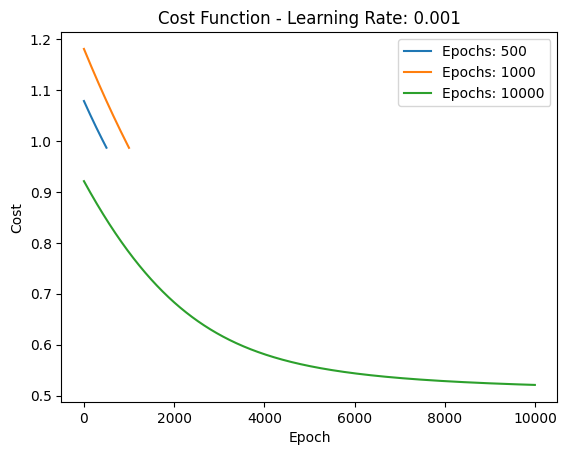

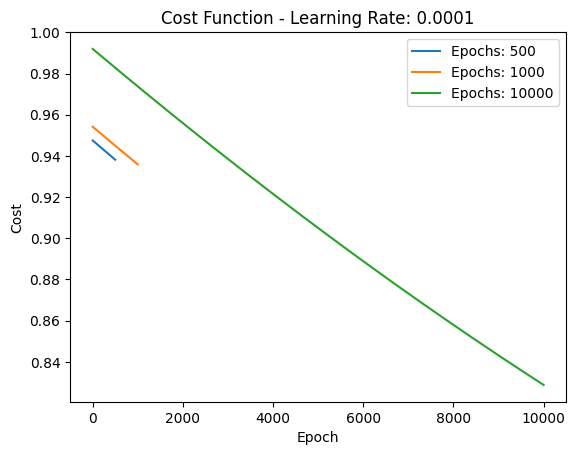

In [111]:
epochs = [500, 1000, 10000]
learning_rates = [0.001, 0.0001]

# Initialize random values of theta coefficient
theta = np.random.rand(x.shape[1] + 1)

for rate in learning_rates:
    for epoch in epochs:
        # Initialize random values for theta coefficients for each graph
        theta = np.random.rand(x.shape[1] + 1)  # +1 for the bias term
        costs = []

        for i in range(epoch):
            theta = updating_thetas(x, y, theta, rate)
            b = np.column_stack((np.ones((x.shape[0], 1)), x))
            y_hat = sigmoid(np.dot(b, theta))
            cost = entropy_loss(y, y_hat)
            costs.append(cost)

        plt.plot(range(epoch), costs, label=f"Epochs: {epoch}")

    plt.title(f"Cost Function - Learning Rate: {rate}")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

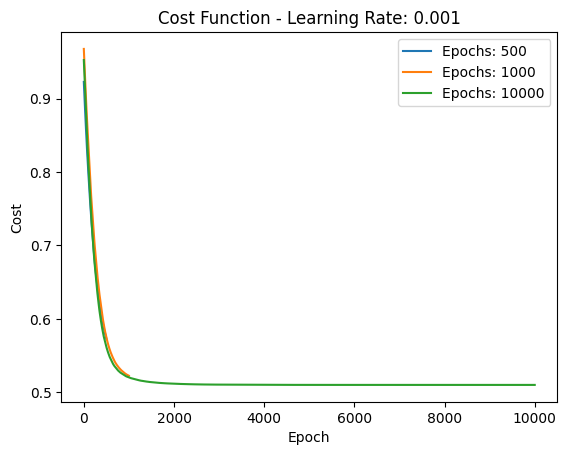

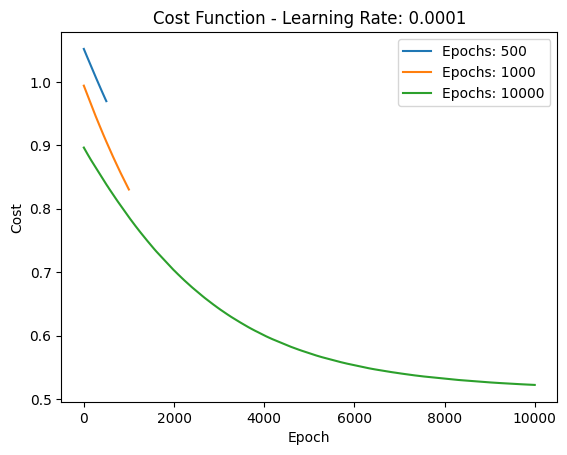

In [112]:
epochs = [500, 1000, 10000]
learning_rates = [0.001, 0.0001]
batch_size = 50

batch = x.shape[0] // batch_size

for rate in learning_rates:
    for epoch in epochs:
        theta = np.random.rand(x.shape[1] + 1)
        costs = []

        for i in range(epoch):
            # Mini-batch gradient descent
            for j in range(batch):
                # Get the batch samples
                batch_samples = np.random.choice(x.shape[0], batch_size, replace=False)
                batchx = x[batch_samples]
                batchy = y[batch_samples]

                theta = updating_thetas(batchx, batchy, theta, rate)

            # Calculate the cost for the entire dataset
            b = np.column_stack((np.ones((x.shape[0], 1)), x))
            y_hat = sigmoid(np.dot(b, theta))
            cost = entropy_loss(y, y_hat)
            costs.append(cost)

        plt.plot(range(epoch), costs, label=f"Epochs: {epoch}")

    plt.title(f"Cost Function - Learning Rate: {rate}")
    plt.xlabel("Epoch")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()

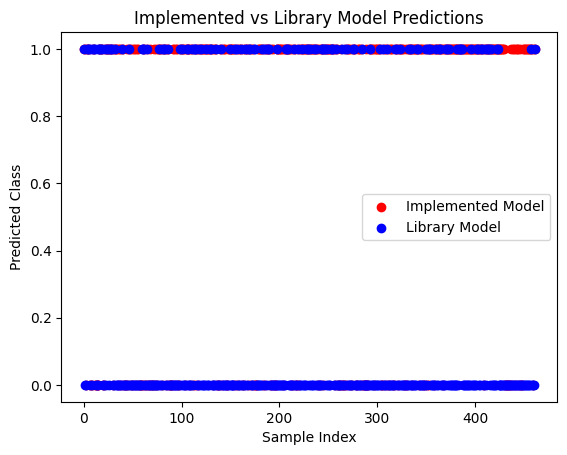

In [113]:
x = normalized_data.drop('chd', axis=1)
y = data['chd'].values

theta = np.random.rand(x.shape[1] + 1)
b = np.column_stack((np.ones((x.shape[0], 1)), x))

# Implemented Learning Rate Model
implemented_model = sigmoid(np.dot(b, theta)) >= 0.5

# Library Learning Rate Model
library_model = LogisticRegression(random_state=0)
library_model.fit(x, y)

# Comparing predictions
implemented_predictions = implemented_model.astype(int)
library_predictions = library_model.predict(x)

# Create a figure and axis for the plot
figure, axis = plt.subplots()

# Plot implemented model predictions
axis.scatter(range(len(implemented_predictions)), implemented_predictions, color='red', label='Implemented Model')

# Plot library model predictions
axis.scatter(range(len(library_predictions)), library_predictions, color='blue', label='Library Model')

axis.set_xlabel('Sample Index')
axis.set_ylabel('Predicted Class')
axis.set_title('Implemented vs Library Model Predictions')
axis.legend()
plt.show()